# K-means K-aris 

In [6]:
import pandas as pd
#from sklearn.cluster import KMeans, AgglomerativeClustering()

In [7]:
df = pd.read_csv("ligue1_17_18.csv", sep=";", index_col=0)
df.head(10)

,Points,Wins,Draws,Loses,Goals.scored,Goals.conceded,Difference.goals,Points.per.game,red.cards,yellow.cards,clean.sheets.percentage,failed.to.score.percentage,shots.per.match.average,shots.on.goal.per.match.average,ball.possession.per.game.average,sum.offside.in.attack,sum.offside.in.defense,corners.per.game.average,fouls.for.sum,fouls.against.sum
Team,,,,,,,,,,,,,,,,,,,,
Paris-SG,93,29,6,3,108,29,79,2.45,6,66,47,8,16.05,6.74,63.34,98,99,6.71,139,105
Monaco,80,24,8,6,85,45,40,2.11,3,70,37,11,15.68,3.18,57.68,93,90,6.39,115,112
Lyon,78,23,9,6,87,43,44,2.05,2,70,39,11,14.55,6.08,56.37,89,76,5.74,114,107
Marseille,77,22,11,5,80,47,33,2.03,3,79,37,8,12.79,3.66,55.89,87,68,5.34,112,85
Rennes,58,16,10,12,50,44,6,1.53,5,63,26,13,12.47,4.08,52.59,86,57,5.32,110,117
Bordeaux,55,16,7,15,53,48,5,1.45,2,73,26,37,12.34,4.74,51.76,84,39,5.13,109,109
Saint-Etienne,55,15,10,13,47,50,-3,1.45,8,72,34,26,12.24,4.74,51.05,82,51,4.87,108,96
Nice,54,15,9,14,53,52,1,1.42,4,83,26,18,11.95,4.08,51.00,78,50,4.87,108,85
Nantes,52,14,10,14,36,41,-5,1.37,6,63,32,26,11.87,4.29,50.68,76,71,4.82,105,122


In [8]:
df.head(2)

,Points,Wins,Draws,Loses,Goals.scored,Goals.conceded,Difference.goals,Points.per.game,red.cards,yellow.cards,clean.sheets.percentage,failed.to.score.percentage,shots.per.match.average,shots.on.goal.per.match.average,ball.possession.per.game.average,sum.offside.in.attack,sum.offside.in.defense,corners.per.game.average,fouls.for.sum,fouls.against.sum
Team,,,,,,,,,,,,,,,,,,,,
Paris-SG,93,29,6,3,108,29,79,2.45,6,66,47,8,16.05,6.74,63.34,98,99,6.71,139,105
Monaco,80,24,8,6,85,45,40,2.11,3,70,37,11,15.68,3.18,57.68,93,90,6.39,115,112


In [9]:
print(df.columns)
print("Number of features in this dataset :",len(df.columns))

Index(['Points', 'Wins', 'Draws', 'Loses', 'Goals.scored', 'Goals.conceded',
       'Difference.goals', 'Points.per.game', 'red.cards', 'yellow.cards',
       'clean.sheets.percentage', 'failed.to.score.percentage',
       'shots.per.match.average', 'shots.on.goal.per.match.average',
       'ball.possession.per.game.average', 'sum.offside.in.attack',
       'sum.offside.in.defense', 'corners.per.game.average', 'fouls.for.sum',
       'fouls.against.sum'],
      dtype='object')
Number of features in this dataset : 20


### Pointscards

We will first consider a smaller dataset to easily understand the results of -means. Create a new dataset in which you consider only Points and Yellow.cards from the original dataset. Name it pointsCards

In [10]:
pointscards = df.loc[:, df.columns.isin(['Points','yellow.cards'])]
pointscards.head()

,Points,yellow.cards
Team,,
Paris-SG,93,66
Monaco,80,70
Lyon,78,70
Marseille,77,79
Rennes,58,63


In [11]:
len(pointscards)

20

# K-means

Apply k-means on pointsCards. Chose k=2 clusters and put the number of iterations to 20. Store your results into km. (Remark: kmeans() uses a random initialization of the clusters, so the results may vary from one call to another. Use set.seed() to have reproducible outputs).

* The purpose of .fit() is to train the model with data.
* The purpose of .predict() or .transform() is to apply a trained model to data.
* If you want to fit the model and apply it to the same data during training, there are .fit_predict() or .fit_transform() for convenience.

When chaining multiple models (such as dimensionality reduction and clustering) apply them in the same order during fitting and testing.

In [17]:
from sklearn.cluster import KMeans
import numpy as np

In [18]:
kmeans = KMeans(n_clusters = 2, n_init=20)

In [19]:
y_kmeans = kmeans.fit_predict(pointscards)

In [20]:
y_kmeans

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

6. What are the coordinates of the centers of the clusters (called also prototypes or centroids) ?

In [21]:
kmeans.cluster_centers_

array([[44.75  , 71.5625],
       [82.    , 71.25  ]])

7. Plot the data (Yellow.cards vs Points). Color the points corresponding to their cluster.

In [22]:
import matplotlib.pyplot as plt

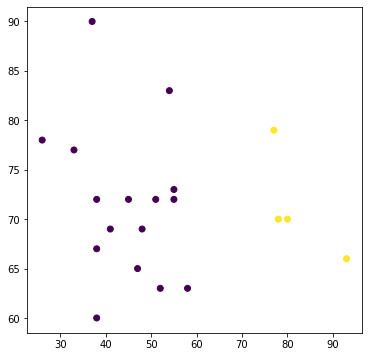

In [24]:
plt.figure(figsize=(6,6));
plt.scatter(pointscards.iloc[:, 0], pointscards.iloc[:,1], c=kmeans.labels_);

8. Add to the previous plot the clusters centroids and add the names of the observations.

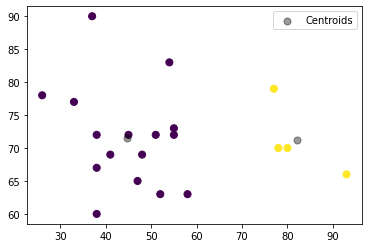

In [25]:
plt.scatter(pointscards.iloc[:, 0], pointscards.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis');
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.4, label = "Centroids");
plt.legend();

9. Re-run k-means on pointsCards using 3 and 4 clusters and store the results into km3 and km4 respectively. Visualize the results like in question 7 and 8.

In [26]:
km3 = KMeans(n_clusters=3).fit(pointscards);
km4 = KMeans(n_clusters=4).fit(pointscards);

km3_fit = km3.predict(pointscards)
km4_fit = km4.predict(pointscards)

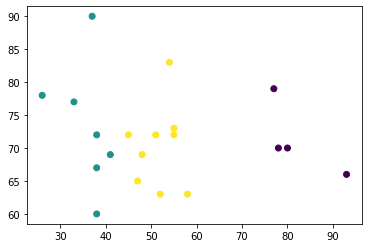

In [27]:
plt.scatter(pointscards.iloc[:, 0], pointscards.iloc[:,1], c=km3_fit);

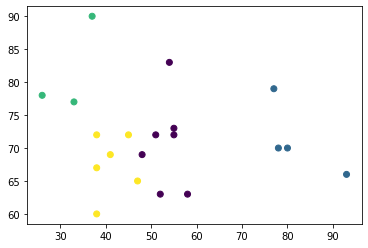

In [28]:
plt.scatter(pointscards.iloc[:, 0], pointscards.iloc[:,1], c=km4_fit);

*How many clusters k do we need in practice?*

10. Visualize the “within groups sum of squares” of the k-means clustering results.

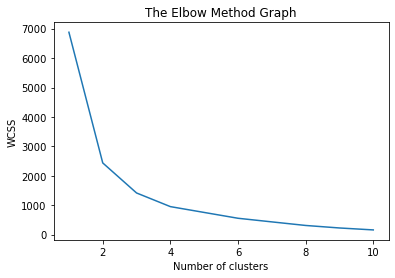

In [29]:
wcss=[]

for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, n_init=20,random_state=0) 
    kmeans.fit(pointscards)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

*Ici n=3 est le bon nombre*

12. Scale the dataset and transform it to a data frame again. Store the scaled dataset into ligue1_scaled.

In [30]:
from sklearn import preprocessing

In [31]:
ligue1_scaled = preprocessing.scale(df)

In [32]:
ligue1_scaled

array([[ 2.37845286e+00,  2.51389675e+00, -1.35680105e+00,
        -1.93622157e+00,  2.67809310e+00, -1.87563570e+00,
         2.78265632e+00,  2.37663716e+00,  8.94736842e-01,
        -7.80554197e-01,  1.92185862e+00, -1.56002389e+00,
         2.35975132e+00,  2.90066301e+00,  2.58380613e+00,
         1.92189533e+00,  8.91620353e-01,  2.53537035e+00,
         2.98101197e+00,  1.28451703e-01],
       [ 1.62061249e+00,  1.66460731e+00, -6.03022689e-01,
        -1.41759079e+00,  1.58499388e+00, -5.50683330e-01,
         1.40893991e+00,  1.62565516e+00, -6.84210526e-01,
        -2.12878417e-01,  9.36290097e-01, -1.32063403e+00,
         2.14685008e+00, -1.14650936e+00,  1.48867788e+00,
         1.48805891e+00,  5.44986090e-01,  2.08848601e+00,
         9.85355422e-01,  6.01694820e-01],
       [ 1.50402166e+00,  1.49474942e+00, -2.26133508e-01,
        -1.41759079e+00,  1.68004598e+00, -7.16302377e-01,
         1.54983390e+00,  1.49312892e+00, -1.21052632e+00,
        -2.12878417e-01,  1.1

13. Apply kmeans() on ligue1 and on ligue1_scaled using 3 clusters and 20 iterations. Store the results into km.ligue1 and km.ligue1.scaled respectively (do not forget to set a seed)

In [222]:
km_ligue1 = KMeans(n_clusters=3, n_init=20)
km_ligue1_scaled = KMeans(n_clusters=3, n_init=20)

14. How many observations there are in each cluster of km.ligue1 and km.ligue1.scaled ? (you can use table()). Do you obtain the same results when you perform kmeans() on the scaled and unscaled data?

In [273]:
km_ligue1_fit = km_ligue1.fit(df)
km_ligue1_scaled_fit = km_ligue1_scaled.fit(ligue1_scaled)

kml1 = km_ligue1_fit.predict(df)
kml1_scaled = km_ligue1_scaled.predict(ligue1_scaled)

In [274]:
kml1_scaled

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

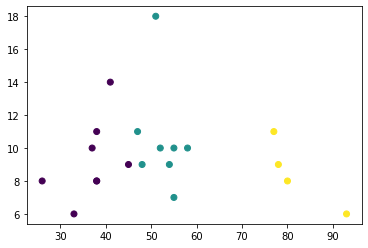

In [244]:
plt.scatter(df.iloc[:,0], df.iloc[:,2], c=kml1);

In [257]:
kml1_dic = {"0":0,"1":0,"2":0}
kml1_scaled_dic = {"0":0,"1":0,"2":0}

for lbl in kml1:
    kml1_dic[str(lbl)] += 1

for lbl in kml1_scaled:
    kml1_scaled_dic[str(lbl)] += 1

print("Unscaled :",kml1_dic)
print("Scaled :",kml1_scaled_dic)
print(kml1)
print(kml1_scaled)

Unscaled : {'0': 8, '1': 4, '2': 8}
Scaled : {'0': 8, '1': 4, '2': 8}
[1 1 1 1 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2]
[1 1 1 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0]


Results are not different whether we use scaled and unscaled data.

## PCA 

15. Apply PCA on ligue1 dataset and store you results in pcaligue1. Do we need to apply PCA on the scaled dataset? Justify your answer.

We will use the scaled dataset to apply PCA.

When variables got different units, we need to scale them. 

### 1. Scale (Centrée-réduire)

In [62]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

In [66]:
sc = StandardScaler()
Z = sc.fit_transform(df) #centrée-réduite

In [68]:
print(Z)
print("Shape :", Z.shape)

[[ 2.37845286e+00  2.51389675e+00 -1.35680105e+00 -1.93622157e+00
   2.67809310e+00 -1.87563570e+00  2.78265632e+00  2.37663716e+00
   8.94736842e-01 -7.80554197e-01  1.92185862e+00 -1.56002389e+00
   2.35975132e+00  2.90066301e+00  2.58380613e+00  1.92189533e+00
   8.91620353e-01  2.53537035e+00  2.98101197e+00  1.28451703e-01]
 [ 1.62061249e+00  1.66460731e+00 -6.03022689e-01 -1.41759079e+00
   1.58499388e+00 -5.50683330e-01  1.40893991e+00  1.62565516e+00
  -6.84210526e-01 -2.12878417e-01  9.36290097e-01 -1.32063403e+00
   2.14685008e+00 -1.14650936e+00  1.48867788e+00  1.48805891e+00
   5.44986090e-01  2.08848601e+00  9.85355422e-01  6.01694820e-01]
 [ 1.50402166e+00  1.49474942e+00 -2.26133508e-01 -1.41759079e+00
   1.68004598e+00 -7.16302377e-01  1.54983390e+00  1.49312892e+00
  -1.21052632e+00 -2.12878417e-01  1.13340380e+00 -1.32063403e+00
   1.49663818e+00  2.15034453e+00  1.23521180e+00  1.14098978e+00
   5.77723771e-03  1.18075221e+00  9.02203066e-01  2.63664022e-01]
 [ 1.44

In [80]:
import numpy as np

print(np.mean(Z, axis=0)) # Mean per column
print(np.std(Z, axis=0)) # Standard deviation per column

[-2.10942375e-16  1.33226763e-16  1.33226763e-16  1.22124533e-16
  8.88178420e-17  1.55431223e-16  0.00000000e+00 -2.77555756e-16
  1.11022302e-16  1.66533454e-17 -1.11022302e-17 -6.66133815e-17
  1.77635684e-16  7.49400542e-16 -6.99440506e-16  4.99600361e-16
  2.33146835e-16  1.46549439e-15 -5.10702591e-16  3.77475828e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


#### 2. Correlation matrix

In [103]:
df.corr()

,Points,Wins,Draws,Loses,Goals.scored,Goals.conceded,Difference.goals,Points.per.game,red.cards,yellow.cards,clean.sheets.percentage,failed.to.score.percentage,shots.per.match.average,shots.on.goal.per.match.average,ball.possession.per.game.average,sum.offside.in.attack,sum.offside.in.defense,corners.per.game.average,fouls.for.sum,fouls.against.sum
Points,1.000000,0.988807,-0.116885,-0.952768,0.931238,-0.675742,0.977609,0.999985,-0.225818,-0.169187,0.744031,-0.860858,0.956606,0.580040,0.987733,0.937424,-0.092212,0.962563,0.947037,0.016671
Wins,0.988807,1.000000,-0.263753,-0.896792,0.942646,-0.626352,0.965056,0.988854,-0.143932,-0.166332,0.719848,-0.834389,0.948466,0.582358,0.975214,0.914942,-0.068495,0.955857,0.939534,0.050872
Draws,-0.116885,-0.263753,1.000000,-0.190254,-0.254172,-0.199432,-0.103548,-0.117294,-0.501858,0.013372,0.018573,-0.011428,-0.128905,-0.126440,-0.105709,-0.029759,-0.140223,-0.139583,-0.131311,-0.230849
Loses,-0.952768,-0.896792,-0.190254,1.000000,-0.842813,0.728963,-0.934712,-0.952628,0.376690,0.163154,-0.741162,0.854462,-0.906196,-0.534711,-0.944060,-0.917554,0.134032,-0.908820,-0.896001,0.054113
Goals.scored,0.931238,0.942646,-0.254172,-0.842813,1.000000,-0.427889,0.923146,0.930795,-0.176222,-0.087514,0.551192,-0.836257,0.898706,0.569905,0.906798,0.816484,-0.027187,0.900192,0.859154,-0.028805
Goals.conceded,-0.675742,-0.626352,-0.199432,0.728963,-0.427889,1.000000,-0.742482,-0.675678,0.285693,0.130156,-0.855932,0.413937,-0.648095,-0.522112,-0.692328,-0.674345,-0.119929,-0.672696,-0.719205,0.085292
Difference.goals,0.977609,0.965056,-0.103548,-0.934712,0.923146,-0.742482,1.000000,0.977254,-0.252126,-0.120223,0.772586,-0.795854,0.941738,0.644463,0.966551,0.891966,0.030863,0.953304,0.942672,-0.057628
Points.per.game,0.999985,0.988854,-0.117294,-0.952628,0.930795,-0.675678,0.977254,1.000000,-0.225178,-0.170996,0.743736,-0.860676,0.956500,0.579047,0.987810,0.938141,-0.094803,0.962873,0.947231,0.015694
red.cards,-0.225818,-0.143932,-0.501858,0.376690,-0.176222,0.285693,-0.252126,-0.225178,1.000000,-0.126980,-0.264547,0.171563,-0.251423,-0.118501,-0.198862,-0.271947,0.108349,-0.237297,-0.128886,0.265799
yellow.cards,-0.169187,-0.166332,0.013372,0.163154,-0.087514,0.130156,-0.120223,-0.170996,-0.126980,1.000000,0.014686,0.081821,-0.261847,-0.248101,-0.204269,-0.314929,0.281089,-0.277221,-0.233363,-0.476372


#### 3. Eigenvalues

En cours, on a vu que E = PDP^T, les valeurs propres sont les valeurs sur la diagonale de la matrice D et les vecteurs propres sont les colonnes de la matrice P

--------------------------------------------------------

In [110]:
pcaligue1 = PCA()
coord = pcaligue1.fit_transform(Z) #coordonnées factorielles
n = pcaligue1.n_components_
print("Nombre de composantes calculées :", n) 
print(pcaligue1.explained_variance_) #valeurs propres associées aux coordonnées factorielles

Nombre de composantes calculées : 20
[1.33598555e+01 2.11950684e+00 1.63175529e+00 1.20908725e+00
 8.00931589e-01 6.00272823e-01 5.11657177e-01 3.87710324e-01
 1.67097995e-01 1.04270484e-01 8.33048898e-02 3.94043708e-02
 2.85585567e-02 6.54448848e-03 2.14582532e-03 5.26717815e-04
 1.42398447e-06 2.50669078e-32 3.89694909e-33 7.63010790e-34]


In [142]:
np.sum(pcaligue1.explained_variance_)

21.052631578947366

In [111]:
eigval = (n-1)/n*pcaligue1.explained_variance_ #to have the same thing as in R
print(eigval)

[1.26918627e+01 2.01353150e+00 1.55016753e+00 1.14863289e+00
 7.60885009e-01 5.70259182e-01 4.86074318e-01 3.68324808e-01
 1.58743095e-01 9.90569596e-02 7.91396453e-02 3.74341522e-02
 2.71306289e-02 6.21726405e-03 2.03853406e-03 5.00381924e-04
 1.35278525e-06 2.38135624e-32 3.70210164e-33 7.24860250e-34]


##### 4. Principal components

In [112]:
coord

array([[ 9.03595584e+00, -1.46042334e+00,  1.78337425e+00,
         9.13856284e-01, -9.85985862e-01, -1.65971669e-01,
        -5.88141496e-01,  4.48434518e-01, -3.57406947e-01,
        -2.36813713e-01, -1.29128632e-01, -1.01998469e-01,
        -3.29864372e-01,  5.23358889e-03,  1.39655301e-03,
         8.11773964e-03, -5.37258725e-05,  1.54853963e-16,
         8.66984816e-18, -8.87821943e-18],
       [ 5.24558825e+00, -4.46383574e-01,  3.46470975e-01,
        -6.79403394e-01,  2.17285076e+00, -2.43909450e-01,
         7.83142997e-02, -1.13383817e+00,  9.46104779e-02,
        -6.38809932e-03,  4.42280818e-01, -3.38698769e-01,
         5.06603471e-02,  3.64788228e-02,  2.88200947e-02,
        -6.93130307e-03, -1.96667296e-04,  1.53694172e-16,
         3.36054626e-18,  3.03540178e-18],
       [ 5.29877644e+00,  2.04113970e-01,  4.95300648e-02,
         6.73161634e-02, -3.73379200e-01, -1.26752743e+00,
         2.39720169e-01,  8.44943677e-01,  4.26815849e-01,
        -3.33944422e-02, -1.7

In [133]:
print(pcaligue1.explained_variance_ratio_) # variance

[6.34593137e-01 1.00676575e-01 7.75083765e-02 5.74316446e-02
 3.80442505e-02 2.85129591e-02 2.43037159e-02 1.84162404e-02
 7.93715476e-03 4.95284798e-03 3.95698226e-03 1.87170761e-03
 1.35653144e-03 3.10863203e-04 1.01926703e-04 2.50190962e-05
 6.76392623e-08 1.19067812e-33 1.85105082e-34 3.62430125e-35]


In [136]:
print("Variance de la première composante : ",eigval[0]/20 * 100)
print("Variance de la deuxième composante :", eigval[1]/20 * 100)
print("Variance de la troisième composante :", eigval[2]/20 * 100)

Variance de la première composante :  63.45931374617314
Variance de la deuxième composante : 10.067657488763267
Variance de la troisième composante : 7.750837647251026


###### 4.1 Scree plot

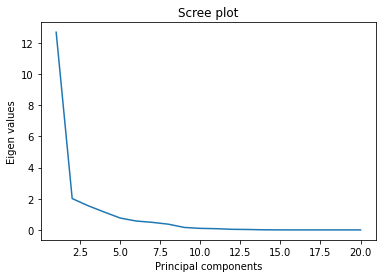

In [138]:
plt.plot(np.arange(1,21),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Principal components")
plt.show()

Apparently, 2 components are enough

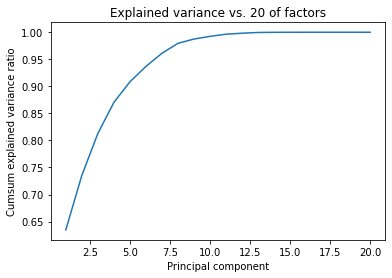

In [139]:
#cumul de variance expliquée
plt.plot(np.arange(1,21),np.cumsum(pcaligue1.explained_variance_ratio_))
plt.title("Explained variance vs. 20 of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Principal component")
plt.show()

16. Plot the observations and the variables on the first two principal components (biplot). Interpret the results.

On a besoin du tableau des corrélations variables-facteurs pour afficher les observations
--> On utilise **coord** car elle contient les coordonnées factorielles selon les axes(selon les principal components)

**Graphes des individus**

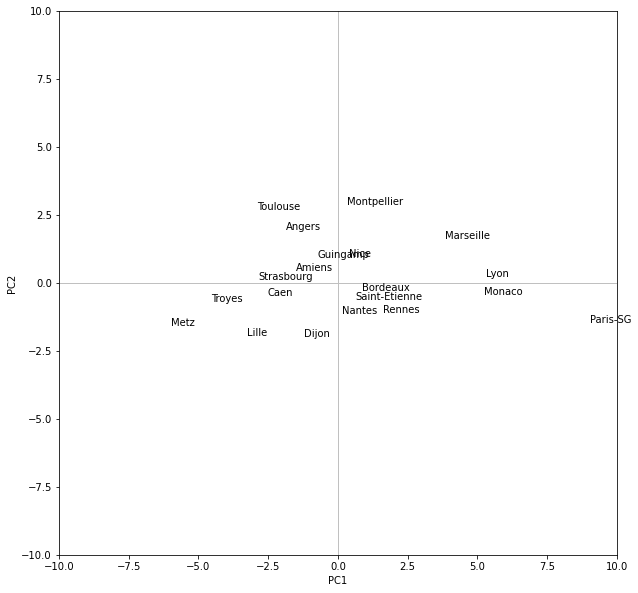

In [294]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)

for i in range(20):
    plt.annotate(df.index[i], (coord[i,0], coord[i,1]))
    #plt.annotate("°", (coord[i,0], coord[i,1]))

plt.plot([-10,10],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-10,10],color='silver',linestyle='-',linewidth=1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

17. Visualize the teams on the first two principal components and color them with respect to their cluster.

In [289]:
pca_km_cestnul = km_ligue1_scaled.predict(coord)
pca_km_cestnul

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

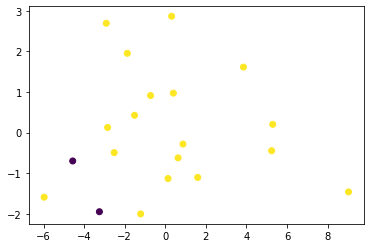

In [292]:
plt.scatter(coord[:,0], coord[:,1], c=pca_km_cestnul);

##### Kmeans with PCA

18. Recall that the figure of question 17 is a visualization with PC1 and PC2 of the clustering done with all the variables, not on PC1 and PC2. Now apply the kmeans() clustering taking only the first two PCs instead the variables of original dataset. Visualize the results and compare with the question 17.

In [293]:
pca_km_test = km_ligue1_scaled.fit_predict(coord) #we fit and predict with the factor coordinates

In [279]:
pca_km_test

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0])

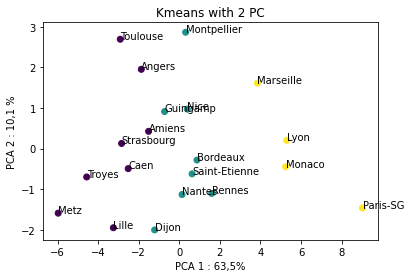

In [296]:
plt.scatter(coord[:,0], coord[:,1], c=pca_km_test);
for i in range(20):
    plt.annotate(df.index[i], (coord[i,0], coord[i,1]))
    
plt.title("Kmeans with 2 PC");
plt.xlabel("PCA 1 : 63,5%");
plt.ylabel("PCA 2 : 10,1 %");